# **Sepsis Prediction**

Sepsis is a life-threatening medical condition characterized by a systemic inflammatory response to infection, leading to organ dysfunction and failure.

The project aims to predict sepsis by utilizing a predictive model that takes into account various input features, including Plasma glucose level, Blood Work Result-1, Blood Pressure, Blood Work Result-2, Blood Work Result-3, Body mass index, Blood Work Result-4, Patient's age, and the presence of insurance. The goal is to develop a comprehensive prediction system for identifying sepsis risk in patients based on these key input variables.

## **1. Business Understanding**

The primary objective of this project is to develop a predictive model for sepsis detection in patients within the Intensive Care Unit (ICU). Sepsis is a life-threatening condition, and early detection is crucial for timely intervention and improved patient outcomes. The business goal is to enhance patient care by providing healthcare professionals with a tool that can assess the likelihood of sepsis development based on key clinical indicators.  

The model will utilize input features such as Plasma glucose level, Blood Work Results, Blood Pressure, Body mass index, Patient's age, and insurance status. The predictions generated by the model will assist healthcare providers in identifying patients at a higher risk of developing sepsis, enabling prompt and targeted medical interventions.

By implementing this predictive model, the healthcare system aims to achieve the following objectives:

1) Early Intervention: Enable healthcare professionals to intervene early in cases with a high predicted risk of sepsis, leading to timely and appropriate medical care.
2) Resource Optimization: Efficiently allocate medical resources by focusing attention on patients identified as high-risk, potentially reducing the overall burden on healthcare facilities.
3) Improved Patient Outcomes: Contribute to better patient outcomes by preventing or minimizing the severity of sepsis through proactive medical management.

### **1.1. Questions**

1. Is there a statistically significant difference in plasma glucose levels between sepsis and non-sepsis cases?

2. Are there specific patterns or thresholds in Blood Work Results associated with a higher likelihood of sepsis?

3. Are there identifiable trends or correlations between blood pressure levels and the likelihood of developing sepsis?

4. Is there a correlation between BMI and the risk of sepsis?

5. Is there a specific age group more susceptible to sepsis?

6. Is there any correlation between insurance status and the likelihood of developing sepsis?

7. Are certain combinations of variables more indicative of sepsis risk?

8. What are the key factors contributing to the model's performance or limitations?

### **1.2. Objectives**

1. Investigate the distribution of plasma glucose levels among patients with and without sepsis.

2. Compare the distributions of Blood Work Results for patients with and without sepsis.

3. Examine the relationship between blood pressure values and the occurrence of sepsis.

4. Analyze the distribution of Body Mass Index among individuals with and without sepsis.

5. Explore the age distribution of patients with sepsis compared to those without.

6. Determine the percentage of patients with valid insurance among those with and without sepsis.

7. Assess how well combined factors predict sepsis occurrence.

8. Evaluate the accuracy of the predictive model in identifying sepsis based on selected features.

### **1.3. Hypotheses**

1. **Plasma Glucose Levels and Sepsis:**
   - Null Hypothesis (H0): There is no significant difference in the distribution of plasma glucose levels between patients with sepsis and those without sepsis.
   - Alternative Hypothesis (H1): There is a significant difference in the distribution of plasma glucose levels between patients with sepsis and those without sepsis.

2. **Blood Work Results and Sepsis:**
   - H0: The distributions of Blood Work Results are similar for patients with and without sepsis.
   - H1: There is a significant difference in the distributions of Blood Work Results between patients with sepsis and those without sepsis.

3. **Blood Pressure Values and Sepsis:**
   - H0: There is no association between blood pressure values and the occurrence of sepsis.
   - H1: There is a significant relationship between blood pressure values and the occurrence of sepsis.

4. **Body Mass Index (BMI) and Sepsis:**
   - H0: The distribution of Body Mass Index is similar among individuals with and without sepsis.
   - H1: There is a significant difference in the distribution of Body Mass Index between individuals with sepsis and those without sepsis.

5. **Age Distribution and Sepsis:**
   - H0: The age distribution is the same for patients with sepsis and those without sepsis.
   - H1: There is a significant difference in the age distribution between patients with sepsis and those without sepsis.

6. **Insurance Status and Sepsis:**
   - H0: There is no difference in the percentage of patients with valid insurance between those with and without sepsis.
   - H1: There is a significant difference in the percentage of patients with valid insurance between those with sepsis and those without sepsis.

7. **Predictive Model and Sepsis Occurrence:**
   - H0: Combined factors do not predict the occurrence of sepsis.
   - H1: Combined factors significantly predict the occurrence of sepsis.

8. **Accuracy of Predictive Model:**
   - H0: The predictive model's accuracy in identifying sepsis based on selected features is not significantly different from random chance.
   - H1: The predictive model's accuracy in identifying sepsis based on selected features is significantly better than random chance.

## **2. Data Understanding**

### **2.1. Import Packages**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

### **2.2. Load and Describe Data**

In [45]:
# Loading Data downloaded from 
df_train = pd.read_csv('../Data/Paitients_Files_Train.csv')
df_test = pd.read_csv('../Data/Paitients_Files_Test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


- No missing values

- All variables are in numbers except Sepssis (object)

In [46]:
df_train['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

### **2.3. EDA**

In [47]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


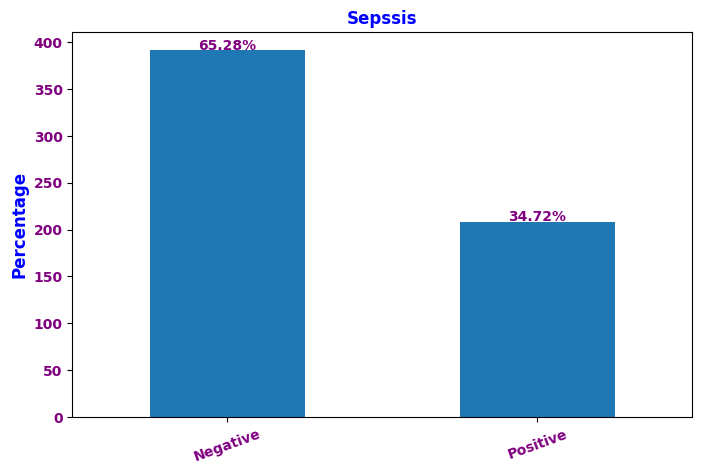

In [48]:
Sepssis_counts = df_train['Sepssis'].value_counts()
# Calculate percentages
total_count = Sepssis_counts.sum()
percentage_values = (Sepssis_counts / total_count) * 100
# Plot the bar chart
ax = Sepssis_counts.plot(kind='bar', figsize=(8,5))
# Annotate bars with percentages
for i, value in enumerate(percentage_values):
    ax.text(i, Sepssis_counts.iloc[i] + 1, f'{value:.2f}%', ha='center', color='purple', fontsize=10, fontweight='bold')
# Set title with font weight and size specified correctly
plt.title('Sepssis', color = 'blue', fontweight ='bold', fontsize =12)
plt.xticks(rotation = 20, color = 'purple', fontweight='bold')
plt.xlabel('')
plt.ylabel('Percentage', color = 'blue', fontweight = 'bold', fontsize = 12)
plt.yticks(color='purple', fontweight='bold')
plt.show()

- **in 34.72% of the patients diagnostic tests indicated the presence of sepsis**

#### **1) Distribution of plasma glucose levels among patients with and without sepsis**



ValueError: 'lightred' is not a valid color value.

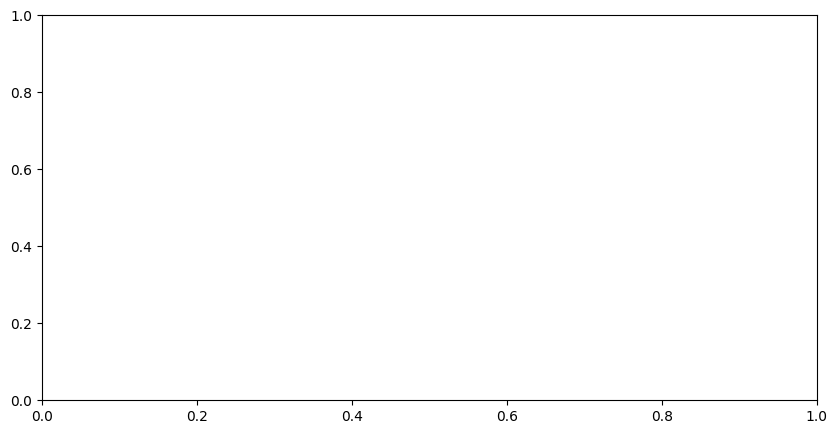

In [51]:
# Filter data for patients with sepsis and without sepsis
sepsis_patients = df_train[df_train['Sepssis'] == 'Positive']
non_sepsis_patients = df_train[df_train['Sepssis'] == 'Negative']

# Plot histograms for plasma glucose levels
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.hist(sepsis_patients['PRG'], bins=20, alpha=0.5, color='lightred', label='With Sepsis')
plt.hist(non_sepsis_patients['PRG'], bins=20, alpha=0.5, color='lightblue', label='Without Sepsis')

# Add labels and title
plt.xlabel('Plasma Glucose Level', color = "blue", fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency', color = 'blue', fontsize = 10, fontweight = 'bold')
plt.title('Distribution of Plasma Glucose Levels Among Patients with and without Sepsis', color = 'blue', fontsize = 11, fontweight='bold')
plt.xticks(color='purple', fontweight = 'bold')
plt.yticks(color='purple', fontweight = 'bold')
plt.legend()
plt.show()